In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%pylab inline
import os
if os.getcwd().endswith('tools'):
    os.chdir('..')

Populating the interactive namespace from numpy and matplotlib


In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import make_blobs, make_classification
from sklearn.cross_validation import train_test_split, ShuffleSplit, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import SGDClassifier

In [96]:
np.random.seed(0)

centers = [[0, 1], [-2, -2], [1, -1]]
n_samples = [1000, 1000, 100]
stds = [.8, .8, .8]
n_clusters = len(centers)

X = []
y = []
for c in range(n_clusters):
    xi, yi = make_blobs(n_samples=n_samples[c], centers=[centers[c]], cluster_std=stds[c], shuffle=False)
    X.append(xi)
    y.append(yi+c)
X = np.concatenate(X)
y = np.concatenate(y)

# get some labeled data
# L = np.random.randint(0, y.shape[0]+1, size=200)
cv = StratifiedShuffleSplit(y, n_iter=1, train_size=.02, test_size=None)
for L, U in cv:
    pass

# dataframe representation of features
dff = pd.DataFrame(X)

L = pd.Index(L).sort_values()
U = pd.Index(U).sort_values()

XL = dff.loc[L, :].values
yL = y.take(L.values)

XU = dff.loc[U, :].values
yU = y.take(U.values)

# XL, XU, yL, yU = train_test_split(X, y, train_size=.1)
print 'Labeled size:', XL.shape
print 'Unlabeled size:', XU.shape

Labeled size: (42L, 2L)
Unlabeled size: (2058L, 2L)


In [97]:
def my_weights(y, ova=False):
    
    n_classes = 2. if ova else float(len(np.unique(y)))
    return dict(zip(np.unique(y), len(y) / (n_classes * np.bincount(y, minlength=len(np.unique(y))))))

[[ 0.94693878  0.01530612  0.0377551 ]
 [ 0.00306122  0.99285714  0.00408163]
 [ 0.15306122  0.15306122  0.69387755]]

Avg Recall =  0.877891156463
Accuracy = 0.956754130224



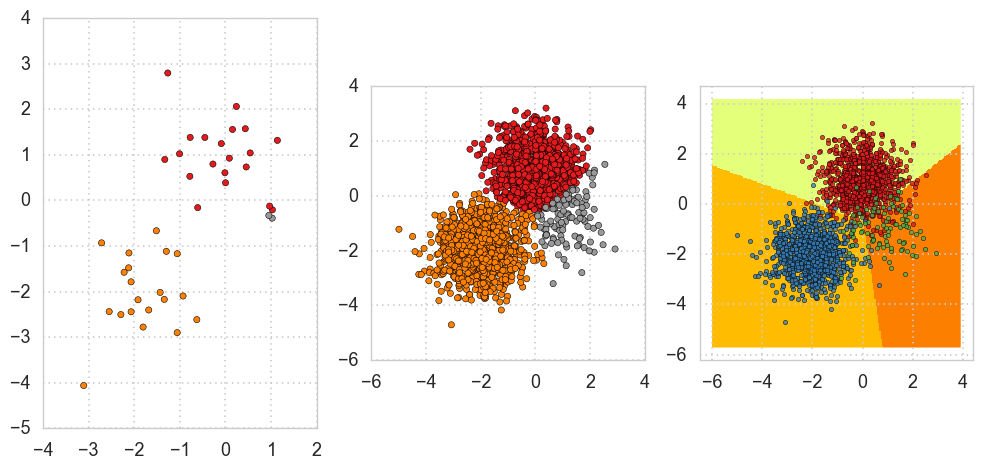

In [99]:
sns.set('talk', 'whitegrid', palette='Set1', rc={'grid.linestyle':':'})
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,3,1)
ax.scatter(XL[:,0], XL[:,1], c=yL, cmap='Set1')
ax.set_aspect('equal')

# ------------

clf = SGDClassifier(alpha=0.01, loss='log', n_iter=25, class_weight=my_weights(yL, ova=False))
clf.fit(XL, yL)
ypU = clf.predict(XU)

cm = confusion_matrix(yU, ypU)
cm = cm / np.sum(cm, axis=1, keepdims=True, dtype=float)
print cm
print
print 'Avg Recall = ', np.sum(np.diag(cm)) / cm.shape[1]
print 'Accuracy =',clf.score(XU, yU)
print

ax = fig.add_subplot(1,3,2)
ax.scatter(XU[:,0], XU[:,1], c=ypU, cmap='Set1')
ax.set_aspect('equal')


# ---------------


# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .05     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = XU[:, 0].min() - 1, XU[:, 0].max() + 1
y_min, y_max = XU[:, 1].min() - 1, XU[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xmesh = np.stack((xx.ravel(), yy.ravel())).T

yMesh = clf.predict(Xmesh).reshape(xx.shape)
# colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# decision surface
ax = fig.add_subplot(1,3,3)
plt.imshow(yMesh, interpolation='None',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap='Wistia',
           aspect='equal', origin='lower')
# Samples
# m = ['o', 'x', 's']
colors = sns.color_palette('Set1', 3)
for k, col in zip(range(n_clusters), colors):
    my_members = yU == k
    ax.scatter(XU[my_members, 0], XU[my_members, 1], color=col, edgecolor='k', s=10, alpha=.8)
# ax.set_xticks(())
# ax.set_yticks(())



In [71]:
clf._expanded_class_weight

array([ 0.7,  0.7,  7. ])

In [ ]:
[[ 0.96888889  0.00888889  0.02222222]
 [ 0.00666667  0.98444444  0.00888889]
 [ 0.3         0.08888889  0.61111111]]

Avg Recall =  0.854814814815
Accuracy = 0.959259259259